In [1]:
import hdfdict
import h5py
import numpy as np

fname = 'frz_multomega_20230329_1345.h5'
f = h5py.File(fname, 'r')
fulldata = hdfdict.load(fname)
h0 = f.attrs['h0']
N = f.attrs['N'] 
nperiods = f.attrs['nperiods']
f.close()
print(h0,N)

1.5707963267948966 100


In [2]:
import hdfdict
import h5py
import numpy as np

fname2 = 'frz_multomega_20230406_0920.h5'
f = h5py.File(fname2, 'r')
fulldata2 = hdfdict.load(fname2)
h0 = f.attrs['h0']
N = f.attrs['N'] 
nperiods = f.attrs['nperiods']
f.close()
print(h0,N)

1.5707963267948966 100


In [3]:
import hdfdict
import h5py
import numpy as np

fname3 = 'frz_multomega_20230406_1117.h5'
f = h5py.File(fname3, 'r')
fulldata3 = hdfdict.load(fname3)
h0 = f.attrs['h0']
N = f.attrs['N'] 
nperiods = f.attrs['nperiods']
f.close()
print(h0,N)

1.5707963267948966 100


In [4]:
!ls *.h5

frz_multomega_20230329_1345.h5	frz_multomega_20230406_1117.h5
frz_multomega_20230406_0920.h5


In [5]:
omegas = np.array([value['metadata']['omega'] for key, value in fulldata.items()])
omegas2 = np.array([value['metadata']['omega'] for key, value in fulldata2.items()])
omegas3 = np.array([value['metadata']['omega'] for key, value in fulldata3.items()])

print(omegas, omegas2, omegas3)

[ 0.5  1.5  8.   9.   9.5 10.  20.  40.  60.  90. ] [ 0.2         1.06086957  8.80869565  9.66956522 10.53043478 11.39130435
 12.25217391 13.11304348 13.97391304 14.83478261 15.69565217 16.55652174
  1.92173913 17.4173913  18.27826087 19.13913043 20.          2.7826087
  3.64347826  4.50434783  5.36521739  6.22608696  7.08695652  7.94782609] [ 1.1    1.45  15.    15.625 16.25  16.875 17.5    1.8    2.15   2.5
  8.     8.75   9.5   10.25  11.   ]


/home/admin/.hpc/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


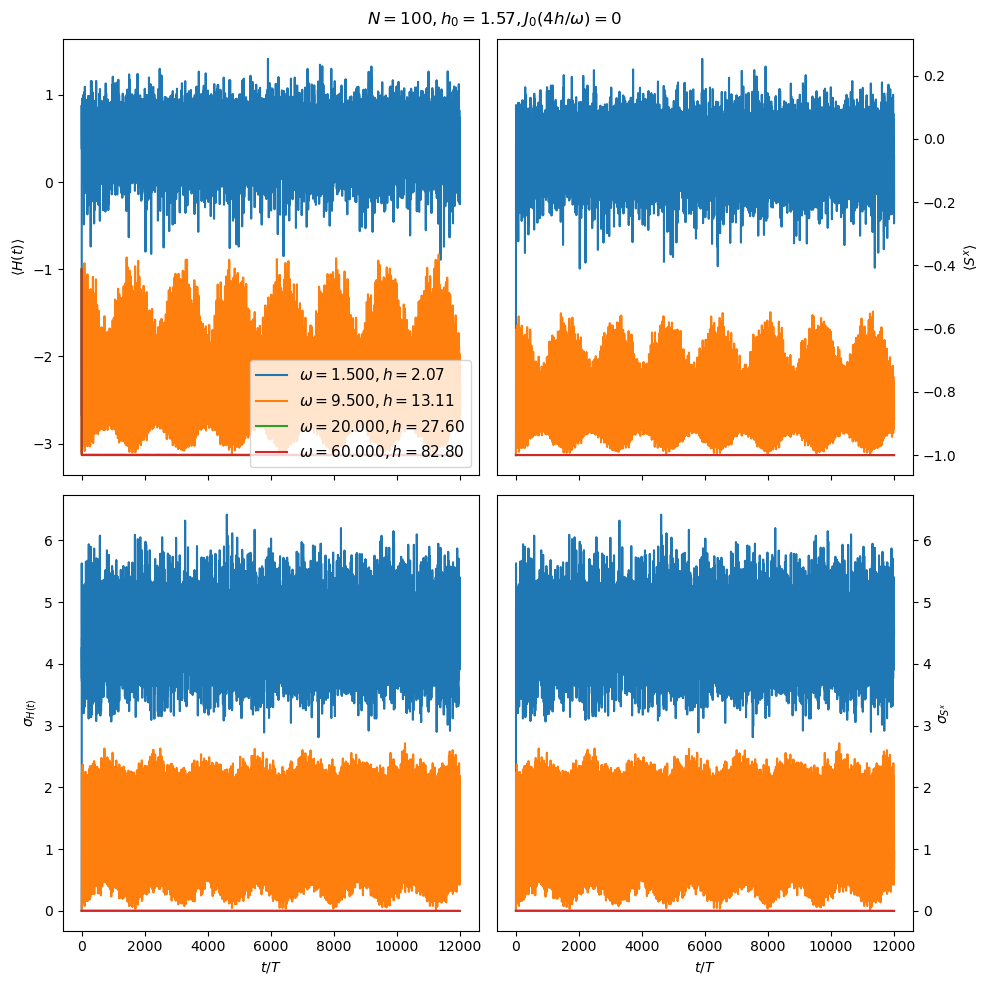

In [3]:
from scipy.special import j0
import matplotlib.pyplot as plt

keys = ['0','1','3','4','5','6','7','8']
keys = ['1','4', '6','8']

fig,axs = plt.subplots(2,2, tight_layout=True, figsize=(10, 10))

fig.suptitle(fr'$N={N}, h_0={h0:1.2f}, J_0(4h/\omega)=0$')

for key in keys:
    data = fulldata[key]
    omega = data['metadata']['omega']
    h = data['metadata']['h']
    axs[0,0].plot(data['eavg'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[0,1].plot(data['sxavg'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[1,0].plot(data['evar'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[1,1].plot(data['evar'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')


axs[0,0].set_ylabel(r"$\langle H(t) \rangle$")


axs[1,0].set_ylabel(r"$\sigma_{H(t)}$")
axs[1,0].set_xlabel(r"$t/T$")
axs[0,1].set_ylabel(r"$\langle S^x \rangle$")
axs[1,1].set_ylabel(r"$\sigma_{S^x} $")
axs[1,1].set_xlabel(r"$t/T$")
axs[0,1].yaxis.tick_right()
axs[1,1].yaxis.tick_right()
axs[0,1].yaxis.set_label_position("right")
axs[1,1].yaxis.set_label_position("right")
axs[0,0].xaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])
axs[0,0].legend(loc='lower right', fontsize=11)

#axs[0,0].set_ylim((-3.5, 0.1))
#axs[0,1].set_ylim((-1.01, -0.5))
#axs[1,0].set_ylim((-3.5, 0.1))
#axs[1,1].set_ylim((-3.5, 0.1))


#get handles and labels
#handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
#order = [2,3,0,5,6,4]

#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

<IPython.core.display.Javascript object>


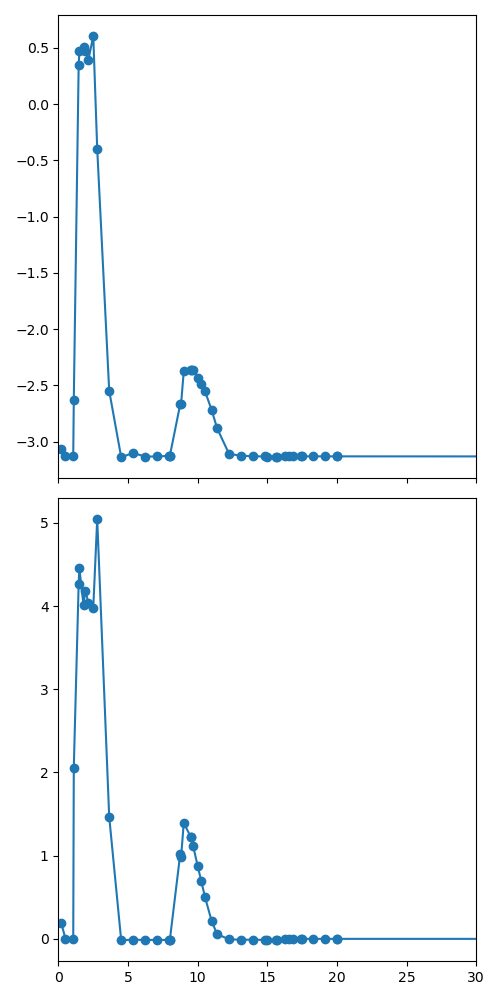

In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

allkeys = [str(i) for i in np.arange(len(omegas))]
allkeys2 = [str(i) for i in np.arange(len(omegas2))]
allkeys3 = [str(i) for i in np.arange(len(omegas3))]

fig,(ax1, ax2) = plt.subplots(2,1, sharex=True, tight_layout=True, figsize=(5, 10))

allomegas = []
ebar = []
evbar = []
for key in allkeys:
    data = fulldata[key]
    omega = data['metadata']['omega']
    allomegas.append(omega)
    h = data['metadata']['h']
    ebar.append(np.average(data['eavg']).real)
    evbar.append(np.average(data['evar']).real)

for key in allkeys2:
    data = fulldata2[key]
    omega = data['metadata']['omega']
    allomegas.append(omega)
    h = data['metadata']['h']
    ebar.append(np.average(data['eavg']).real)
    evbar.append(np.average(data['evar']).real)
    
for key in allkeys3:
    data = fulldata3[key]
    omega = data['metadata']['omega']
    allomegas.append(omega)
    h = data['metadata']['h']
    ebar.append(np.average(data['eavg']).real)
    evbar.append(np.average(data['evar']).real)
    
x, y = zip(*sorted(zip(allomegas,ebar)))
ax1.plot(x,y,marker='o')

x, y = zip(*sorted(zip(allomegas,evbar)))
ax2.plot(x,y,marker='o')

for ax in (ax1, ax2):
    ax.set_xlim((0.0,30.0))

In [15]:
o1 = np.linspace(1.29, 1.58, 5)
o2 = np.linspace(1.6, 2.5, 5)
o3 = np.linspace(2.8, 4.38, 5)
o4 = np.linspace(8, 9.4, 5)

np.concatenate((o1, o2, o3, o4))

array([1.29  , 1.3625, 1.435 , 1.5075, 1.58  , 1.6   , 1.825 , 2.05  ,
       2.275 , 2.5   , 2.8   , 3.195 , 3.59  , 3.985 , 4.38  , 8.    ,
       8.35  , 8.7   , 9.05  , 9.4   ])

(-0.05, 1.05)

/usr/local/anaconda3/anaconda3/envs/hpc/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/anaconda3/anaconda3/envs/hpc/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


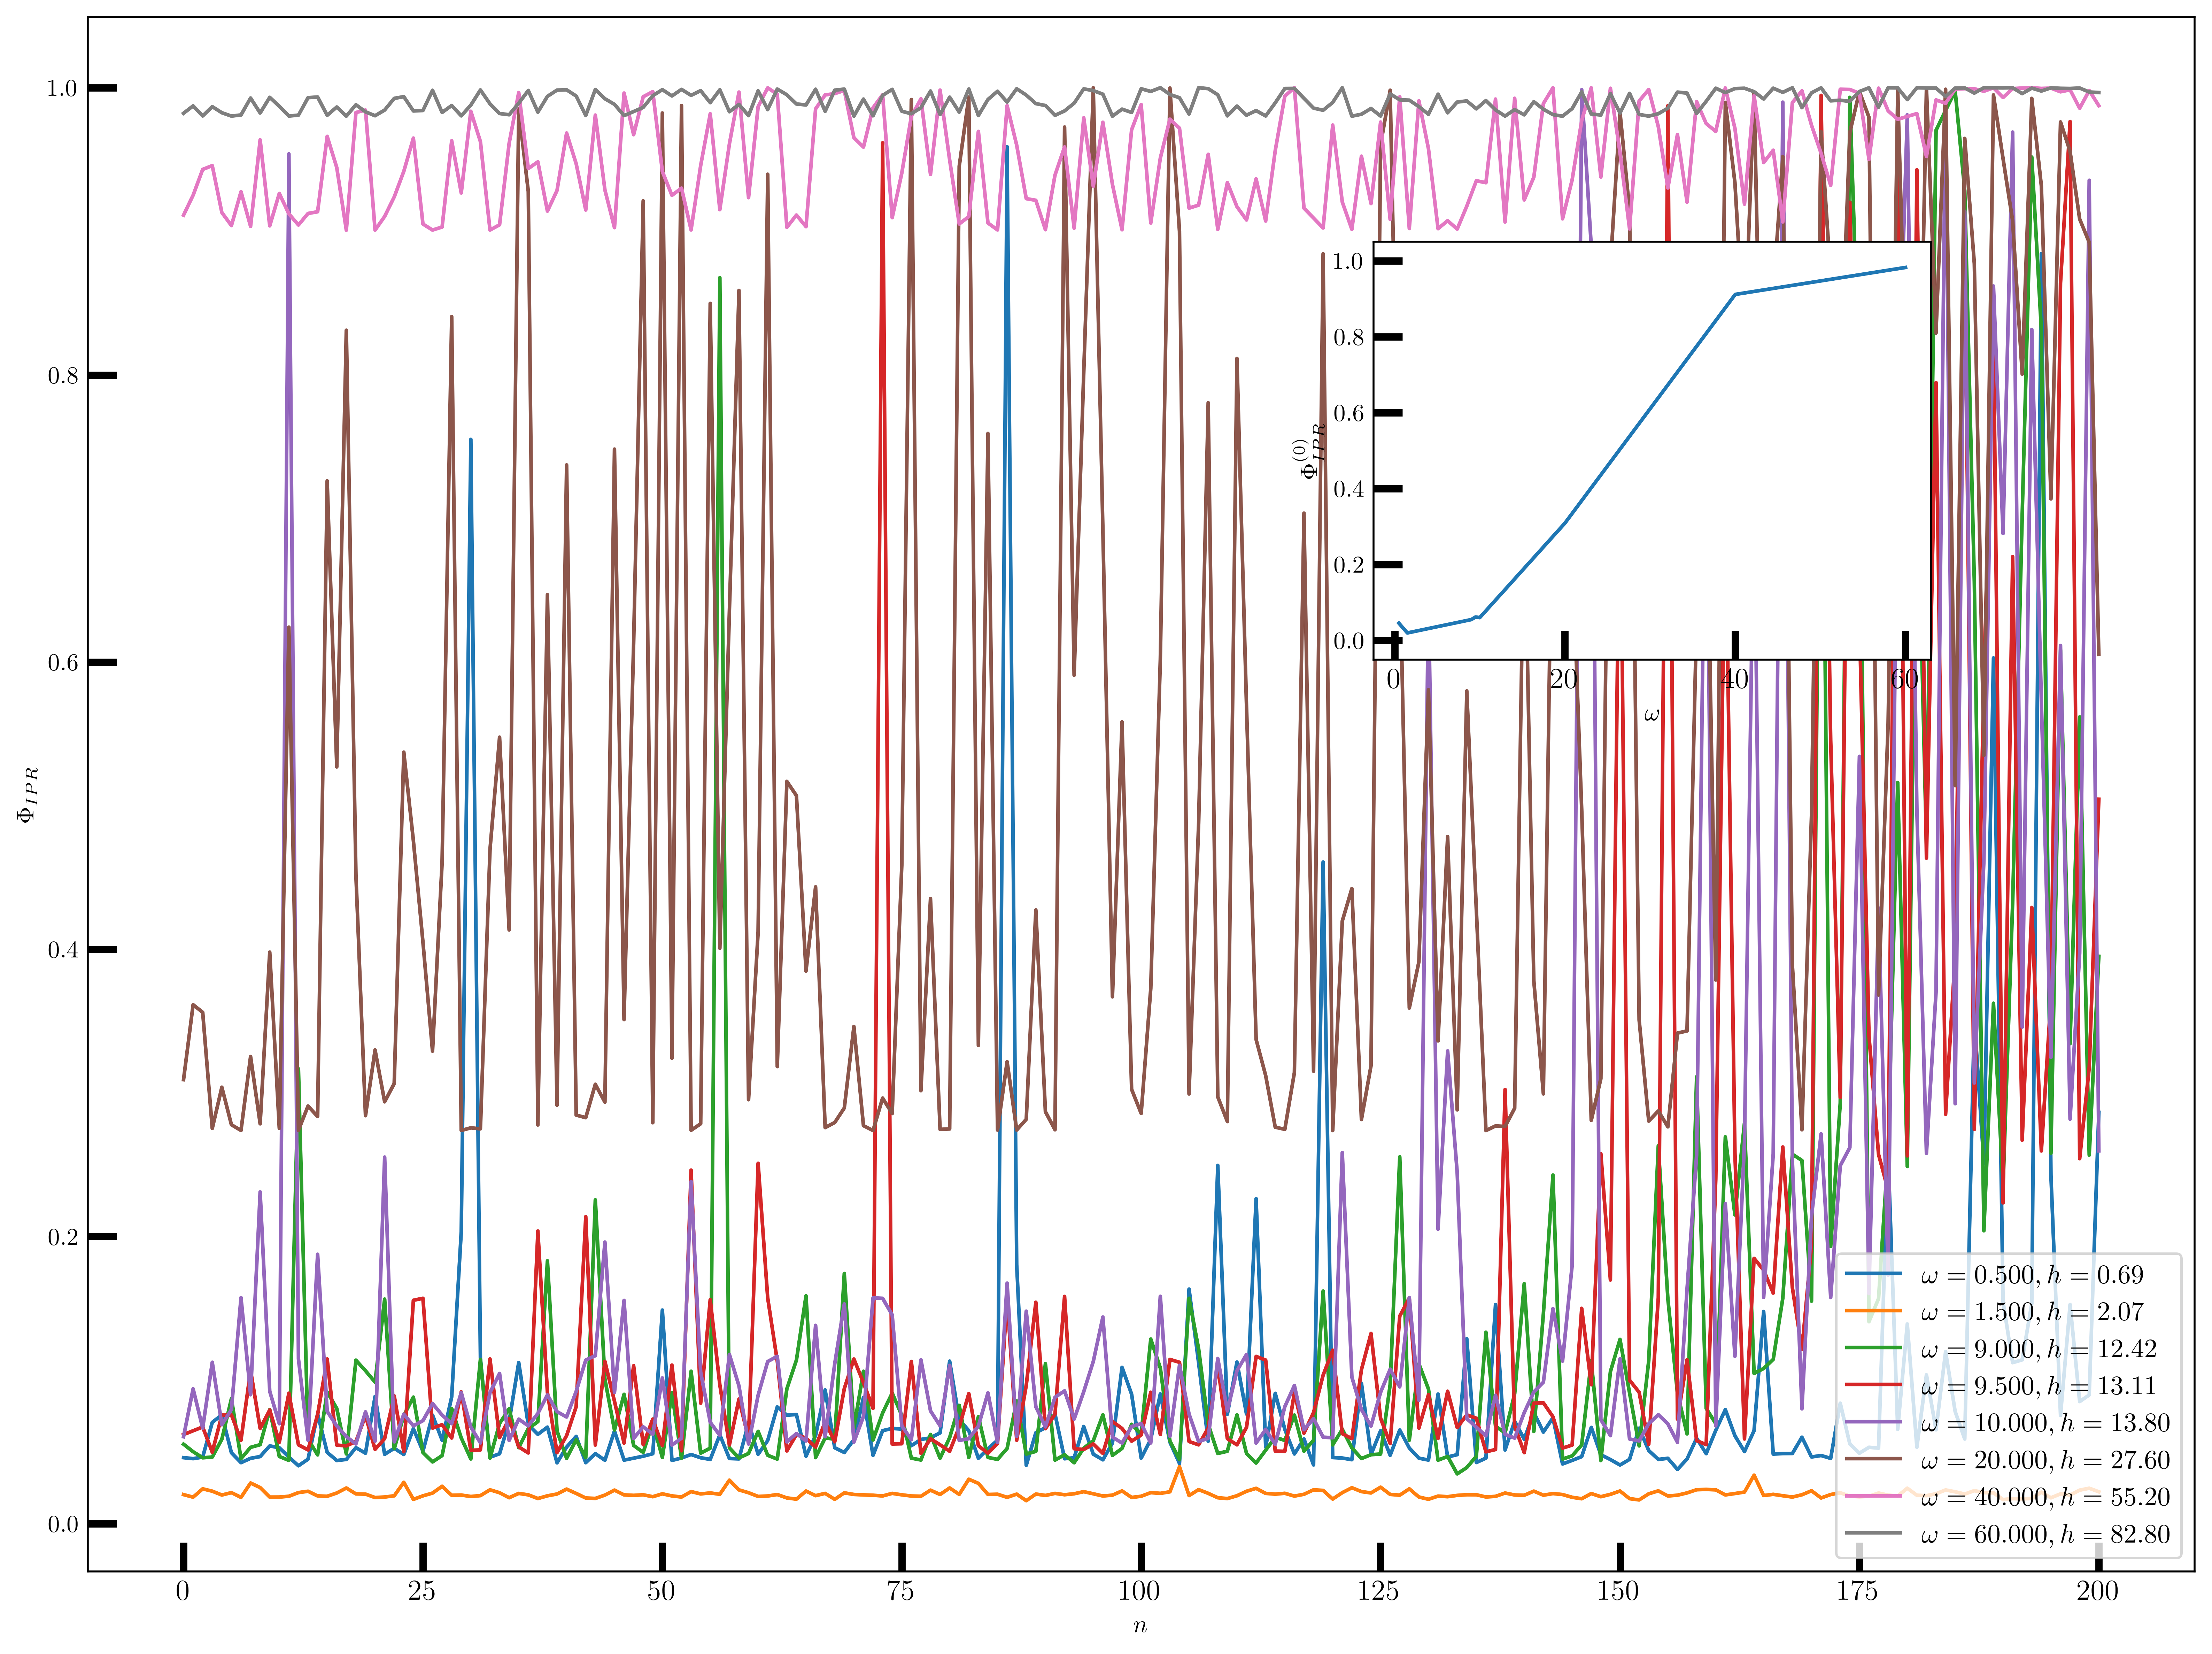

In [20]:
from scipy.special import j0
import matplotlib.pyplot as plt


chosen_state = 0
keys = ['0','1','3','4','5','6','7','8']
fig, ax1 = plt.subplots()

omegas = []
iprdata = []

for key in keys:
    data = fulldata[key]
    omega = data['metadata']['omega']
    omegas.append(omega)
    h = data['metadata']['h']
    ax1.plot(data['ipr'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    iprdata.append(data['ipr'][chosen_state])

    
ax1.set_ylabel(r"$\Phi_{IPR}$")
ax1.set_xlabel(r"$n$")
ax1.legend(loc='lower right', fontsize=11)

left, bottom, width, height = [0.62, 0.6, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(omegas, iprdata)
ax2.set_xlabel(r"$\omega$")

ax2.set_ylabel(r"$\Phi^{(0)}_{IPR}$")
ax2.set_ylim((-0.05,1.05))


#get handles and labels
#handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
#order = [2,3,0,5,6,4]

#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])